In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### NLP(Natural Language Processing)
- **자연어**란 우리가 평소에 말하는 음성이나 텍스트를 의미한다.
- 따라서 자연어 처리란 이러한 음성이나 텍스트를 컴퓨터가 인식하고 처리할 수 있도록 하는 것을 의미한다.
- 문제는 컴퓨터 알고리즘은 수치로 된 데이터만을 받아들이고 학습할 수 있으며, 텍스트는 이해할 수 없다는 것이다.
    - 따라서 텍스트를 딥러닝 신경망이 이해할 수 있도록 전처리를 거치는 과정이 필수이다.  
    
#### 1. 텍스트의 토큰화(Tokenization)
- 우리가 텍스트를 전처리 하기 위해서 먼저 해야 하는 것은 의미있는 소단위로 나누는 것이다.
- 입력할 텍스트가 준비가 되면 우리는 이를 단어, 문장, 형태소 별로 나누어야 하고 이렇게 잘게 나누어진 하나의 단위를 토큰(token)이라고 한다.  

1. '공학자와 과학자를 위한 대학 물리학'이라는 구절이 있다고 해보자. 우리는 이를 위한 토큰화 과정을 거쳐야 한다.
    - keras의 text module중에 ```text_to_word_sequence()```라는 함수를 사용하면 문장을 단어 단위로 쉽게 나눌 수 있다.
    - 영어, 한글 모든 언어가 가능하다.

In [2]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
text = '공학자와 수학자를 위한 대학 물리학'
result = text_to_word_sequence(text)
result

['공학자와', '수학자를', '위한', '대학', '물리학']

In [3]:
text = 'Physics for Scientists and Engineers with Modern Physics'
text_to_word_sequence(text)

['physics',
 'for',
 'scientists',
 'and',
 'engineers',
 'with',
 'modern',
 'physics']

- 이런 식으로 주어진 텍스트를 단어 단위로 쪼개면 
    - 각 단어가 몇 번이나 중복되었는지 확인할 수 있다.
    - 이렇게 단어의 빈도수를 파악하면 텍스트에서 중요한 역할을 하는 단어 파악이 가능하기 때문에 텍스트를 단어 단위로 쪼개는 것은 많이 쓰이는 전처리 과정이다.  
    
- 실제로 이러한 전처리 과정을 일컫는 용어가 있는데, 바로 'bag-of-words'이다.
- 같은 단어끼리 따로 담고 각 가방에 몇개의 단어가 있는지 세는 기법이다.

    - 직접 할 수도 있겠지만 이 또한 keras에 ```Tokenizer()```이라는 함수로 수행이 가능하다.

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
texts = ['알고리즘, 자료구조, 파이썬 중에서 하나라도 제대로 배우고 싶은 분들에게 추천합니다.',
        '입문자뿐 아니라 알고리즘과 자료구조를 다시 복습하고 싶은 개발자에게도 유용한 책입니다.',
        '개발자의 기본 소양을 길러주는 파이썬 알고리즘과 자료구조의 정석']
token = Tokenizer()
token.fit_on_texts(texts)
#단어의 빈도수를 계산한 결과
token.word_counts

OrderedDict([('알고리즘', 1),
             ('자료구조', 1),
             ('파이썬', 2),
             ('중에서', 1),
             ('하나라도', 1),
             ('제대로', 1),
             ('배우고', 1),
             ('싶은', 2),
             ('분들에게', 1),
             ('추천합니다', 1),
             ('입문자뿐', 1),
             ('아니라', 1),
             ('알고리즘과', 2),
             ('자료구조를', 1),
             ('다시', 1),
             ('복습하고', 1),
             ('개발자에게도', 1),
             ('유용한', 1),
             ('책입니다', 1),
             ('개발자의', 1),
             ('기본', 1),
             ('소양을', 1),
             ('길러주는', 1),
             ('자료구조의', 1),
             ('정석', 1)])

In [5]:
#총 몇개의 문장이 존재하는지
token.document_count

3

In [6]:
#각 단어들이 몇개의 문장에 나오는가
token.word_docs

defaultdict(int,
            {'제대로': 1,
             '하나라도': 1,
             '싶은': 2,
             '분들에게': 1,
             '자료구조': 1,
             '배우고': 1,
             '추천합니다': 1,
             '중에서': 1,
             '파이썬': 2,
             '알고리즘': 1,
             '입문자뿐': 1,
             '알고리즘과': 2,
             '복습하고': 1,
             '개발자에게도': 1,
             '자료구조를': 1,
             '유용한': 1,
             '아니라': 1,
             '다시': 1,
             '책입니다': 1,
             '기본': 1,
             '자료구조의': 1,
             '길러주는': 1,
             '소양을': 1,
             '정석': 1,
             '개발자의': 1})

In [8]:
#각 단어에 매겨진 인덱스의 값 출력(이 값은 그냥 랜덤으로 라벨링 된 것으로, 나중에 Embedding layer이 등장할때 필요하다.)
token.word_index

{'파이썬': 1,
 '싶은': 2,
 '알고리즘과': 3,
 '알고리즘': 4,
 '자료구조': 5,
 '중에서': 6,
 '하나라도': 7,
 '제대로': 8,
 '배우고': 9,
 '분들에게': 10,
 '추천합니다': 11,
 '입문자뿐': 12,
 '아니라': 13,
 '자료구조를': 14,
 '다시': 15,
 '복습하고': 16,
 '개발자에게도': 17,
 '유용한': 18,
 '책입니다': 19,
 '개발자의': 20,
 '기본': 21,
 '소양을': 22,
 '길러주는': 23,
 '자료구조의': 24,
 '정석': 25}

#### 2. 단어의 원-핫 인코딩(One-Hot-Encoding)
- 지금까지는 단순히 문장 내에서의 단어에 관한 간단한 정보만 파악했을 뿐, 정작 실질적인 내용인 단어와 단어, 문장과 문장사이의 관계에 대해서는 파악할 수가 없었다.
- 그러한 것을 알아보기 위한 가장 기본적 방법이 원-핫 인코딩이다.
    - 각 단어를 모두 0으로 바꾸어 주고 원하는 단어만 1로 바꿔주면 되는 것이고, 이를 위해서 단어 수만큼 0으로 채워진 벡터 공간을 만들어야 한다.

In [14]:
text = '행복은 우리가 생각하는 것보다 멀리 있다.'
token = Tokenizer()
token.fit_on_texts([text])
token.word_index

{'행복은': 1, '우리가': 2, '생각하는': 3, '것보다': 4, '멀리': 5, '있다': 6}

In [15]:
#Tokenizer의 texts_to_sequences() 함수를 이용하여 앞서 만든 토큰의 단어의 인덱스만을 리스트에 넣어 반환한다.
text = token.texts_to_sequences([text])

In [16]:
text

[[1, 2, 3, 4, 5, 6]]

In [18]:
from tensorflow.keras.utils import to_categorical
word_size = len(token.word_index)+1
to_categorical(text, word_size)

array([[[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]]], dtype=float32)

#### 3. 단어 임베딩(Embedding)
- 이제 단어의 벡터화까지 마무리했다. 
- 하지만 우리가 알고 있는 것은 문장 내에서의 단어의 순서밖에 없다고 봐도 무방한 것 같다.
- 또한, 다뤄야 할 데이터의 길이가 너무 길어 보인다.
    - 우리는 다뤄야 할 텍스트의 단어의 개수 + 1개만큼의 array를 갖고 학습을 해야 하는데, 이대로라면 학습 가능한 데이터의 양에 제한이 있을 수 밖에 없다.
    - 이때 필요한 것이 **Embeddding Layer**이다.  
    
    **Embedding Layer**
    1. 단어 임베딩은 주어진 배열을 정해진 길이로 압축 시킨다.
    2. 이는 단어 간의 유사도를 고려해 주기 때문이다.
    3. 그렇게 해서 각 배열을 새로운 수치로 바꾸게 되는데, 이 유사도를 계산하는 방법에 **오차 역전파**가 등장한다.
        - 즉, 적절한 크기의 배열로 바꿔주기 위한 최적의 유사도를 계산하는 학습 과정을 거치는 것이다.
        - 이는 Embedding() 함수를 이용하면 구현이 다능하다.
        - Embedding() 함수는 최소 2개의 parameter을 필요로 하는데, 입력과 출력의 크기이다. 즉, 입력되는 총 단어의 수와 임베딩 한 후의 벡터의 크기를 결정 짓는 것이다. 여기에 'input_length'라는 값까지 설정하면 한번에 몇개의 단어를 학습할지 정해준다.  
        
        
        
**이를 실습해 보기 위해 IMDB 데이터셋을 사용할 것이다.** 

In [19]:
from tensorflow.keras.datasets import imdb

In [30]:
#빈도수 높은 10000개의 단어만 사용하도록 한다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [31]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

- 일단 이미 데이터셋이 정수화가 되어 있다. 그렇기 때문에 Tokenenization과 to_categorical을 이용해서 수치화할 필요는 따로 없다.
- y값의 데이터는 0,1로 긍정/부정으로 나뉘어 있다.

In [32]:
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

- 우리가 일단은 이 수치화된 데이터가 어떤 형태인지 문자로 바꿔볼 필요는 있다.
- 그렇기 때문에 인덱스와 단어를 매칭한 사전형 자료를 만들어야 한다.

In [34]:
worddict = imdb.get_word_index()

In [65]:
key = worddict.keys()
values = worddict.values()
word_index = dict()
for i,v in worddict.items():
    word_index[v+3] = i

In [63]:
sentence = ' '.join(word_index[i] for i in x_train[0] if i in word_index)

In [64]:
sentence

"this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert is an amazing actor and now the same being director father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also to the two little boy's that played the of norman and paul they were just brilliant children are often left out of the list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole 

- 이제 신경망에 입력하기 위해 정수용 텍스트를 텐서로 바꾸어야 하는데, 이렇게 하는 방법에는 one-hot-encoding과
- 정수 배열의 길이가 모두 같도록 padding을 추가해서 max_length x num_reviews의 크기의 정수 텐서를 만들어도 된다.
    - 영화 리뷰의 각 문장의 길이가 같기 위해서 pad_sequences를 이용한다.

In [67]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, value = 0, padding = 'post', maxlen = 300)
x_test = pad_sequences(x_test, value = 0, padding = 'post', maxlen = 300)

In [78]:
x_train[0].shape, x_test.shape

((300,), (25000, 300))

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

In [79]:
model = Sequential()
model.add(Embedding(10000, 16, input_shape = (300,)))
model.add(GlobalAveragePooling1D())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 161,089
Trainable params: 161,089
Non-trainable params: 0
_________________________________________________________________


In [83]:
early_cb = EarlyStopping(patience = 10, monitor = 'val_loss')
#adam은 learning rate와 gradient를 모두 고려해서 가중치를 갱신하기 떄문에 제일 많이 쓰인다.
#즉, 학습 도중 learning rate와 gradient를 모두 수정하는 optimizer이기 때문에 성능이 좋다.

#모델의 마지막 출력층이 sigmoid일 때 주로 손실함수로 binary_crossentropy를 쓴다.
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',callback = [early_cb], metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

In [85]:
model.evaluate(x_test, y_test,verbose = 0)

[2.7740326899213286, 0.8318]

**Accuracy = 83.18%**

In [ ]:
history.history

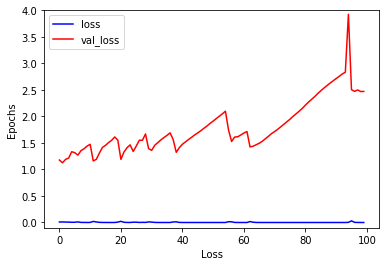

In [112]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r-')
plt.ylabel('Epochs')
plt.xlabel('Loss')
plt.legend(['loss', 'val_loss'])
plt.ylim(-0.1, 4.0)
plt.show()

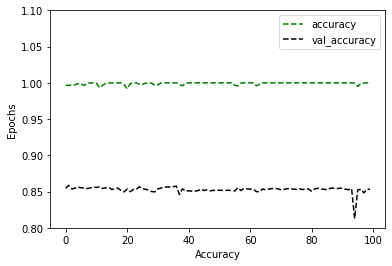

In [110]:
plt.plot(history.history['accuracy'], 'g--')
plt.plot(history.history['val_accuracy'], 'k--')
plt.ylabel('Epochs')
plt.xlabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim(0.8,1.1)
plt.show()